# <font color='black'>Driver Behavior TPIIS</font>


In [1]:
'''
Bibliotecas e Módulos
'''
#Bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import pickle

#Módulos
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

#Módulos (Algoritmos - ML)
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### <font color='black'>1 - Carregar Dataset (c/Janela Deslizante)</font>
#### <u>Utilizar o arquivo de pre-processamento.ipynb</u>

In [2]:
'''
Dataset
'''
datasetname = 'db_w15'
#Carregar Dataset
dat = pd.read_csv('./dataset-mod/'+datasetname+'.csv')
print("=== (linhas, colunas) ===")
print(dat.shape)
print("")

# Verificar as 5 primeiras linhas
print("=== 5 primeiras linhas do Dataset ===")
print(dat.head())

#Número de casos por classe
print("")
print("=== Número de casos por classe ===")
print("")
for i in range(1, 5):
    Class = len(dat.loc[dat['Class'] == i])
    print("Classe "+str(i)+": "+str(Class))

=== (linhas, colunas) ===
(1100, 31)

=== 5 primeiras linhas do Dataset ===
   Class     GyroX     GyroY     GyroZ      AccX      AccY      AccZ  \
0      1  1.282443  0.404580  1.198473  0.577393 -0.297363 -0.860840   
1      1 -0.236641  0.732824  1.450382  0.347168 -0.072510 -1.052246   
2      1 -0.847328  2.030534  0.694656  0.490479 -0.109619 -0.966064   
3      1  1.770992  8.526718  1.946565  0.455322 -0.253174 -0.851318   
4      1 -0.610687  4.450382  0.816794  0.157959 -0.065430 -1.016357   

   GyroMeanX  GyroMeanY  GyroMeanZ    ...     AccMeanZ   AccMinX   AccMinY  \
0  -0.111959   4.086514   0.061578    ...    -0.952067  0.158936 -0.297363   
1  -0.066158   3.889059   0.103308    ...    -0.957585  0.158936 -0.297363   
2  -0.062087   3.722137   0.094148    ...    -0.954443  0.158936 -0.297363   
3   0.003562   4.025954   0.184733    ...    -0.950423  0.158936 -0.297363   
4  -0.059542   4.018321   0.255980    ...    -0.955729  0.157959 -0.297363   

    AccMinZ   AccMaxX 

### <font color='black'>2 - Analisando Dataset</font>

In [3]:
print("=== Correlação entre as variáveis ===")
# Identificar correlação entre as variáveis
def plot_corr(dat, size=7):
    corr = dat.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

# Visualizar correlação em uma tabela
dat.corr()

=== Correlação entre as variáveis ===


,Class,GyroX,GyroY,GyroZ,AccX,AccY,AccZ,GyroMeanX,GyroMeanY,GyroMeanZ,...,AccMeanZ,AccMinX,AccMinY,AccMinZ,AccMaxX,AccMaxY,AccMaxZ,AccStdX,AccStdY,AccStdZ
Class,1.000000,-0.051888,0.071571,0.180448,-0.014408,0.210261,-0.034879,-0.159799,0.229449,0.341044,...,-0.133974,0.061460,0.210724,0.260928,0.101375,0.402074,-0.385845,0.192708,0.356059,-0.438971
GyroX,-0.051888,1.000000,-0.132174,-0.461350,-0.097924,-0.422867,-0.019026,0.355665,-0.087455,-0.264468,...,-0.027161,-0.144598,-0.173759,0.033558,0.029517,-0.229032,-0.060268,0.132759,-0.090829,-0.070563
GyroY,0.071571,-0.132174,1.000000,0.284597,0.269400,0.229483,-0.166146,-0.061060,0.329746,0.135630,...,-0.075156,0.122266,0.135391,0.023176,0.100013,0.049703,-0.063049,0.025126,-0.071652,-0.047547
GyroZ,0.180448,-0.461350,0.284597,1.000000,0.289463,0.817057,-0.053174,-0.477567,0.267779,0.608584,...,-0.045272,0.327862,0.441369,-0.011861,0.035257,0.446747,0.031716,-0.199331,0.111849,0.055711
AccX,-0.014408,-0.097924,0.269400,0.289463,1.000000,-0.150995,0.041294,-0.118828,0.208959,0.195541,...,-0.040214,0.243627,0.137145,0.008120,0.310868,0.035377,-0.031574,0.113107,-0.065820,-0.038033
AccY,0.210261,-0.422867,0.229483,0.817057,-0.150995,1.000000,-0.065059,-0.379396,0.187969,0.472109,...,-0.023727,0.201547,0.386314,0.018831,-0.080784,0.395348,0.020604,-0.211590,0.100811,0.026758
AccZ,-0.034879,-0.019026,-0.166146,-0.053174,0.041294,-0.065059,1.000000,0.002235,-0.087966,-0.005381,...,0.272987,-0.015304,-0.002128,0.131772,-0.033047,0.004450,0.105165,-0.043162,-0.003349,-0.023262
GyroMeanX,-0.159799,0.355665,-0.061060,-0.477567,-0.118828,-0.379396,0.002235,1.000000,-0.187625,-0.761955,...,-0.018017,-0.462908,-0.511308,0.113541,0.095821,-0.674036,-0.208676,0.397889,-0.290763,-0.252496
GyroMeanY,0.229449,-0.087455,0.329746,0.267779,0.208959,0.187969,-0.087966,-0.187625,1.000000,0.385366,...,-0.282445,0.313804,0.397893,0.032357,0.371564,0.163061,-0.196272,0.163329,-0.163451,-0.099729
GyroMeanZ,0.341044,-0.264468,0.135630,0.608584,0.195541,0.472109,-0.005381,-0.761955,0.385366,1.000000,...,-0.016268,0.609938,0.776240,-0.030529,0.066100,0.811696,0.127454,-0.332399,0.243187,0.162991


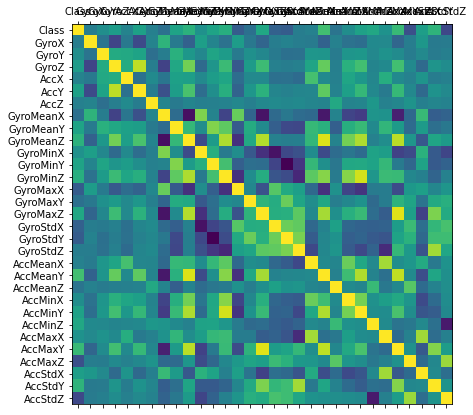

In [4]:
# Criar gráfico
plot_corr(dat)

### <font color='black'>3 - Pré-Processamento</font>

In [5]:
'''
Verificar Dataset
'''
print("=== Valores nulos? ===")

# Verificar se existe valores nulos
print(dat.isnull().values.any())
print("")

=== Valores nulos? ===
False



In [6]:
def plotNormalize(axis, dataset):
    plt.figure(figsize=(20,4))

    plt.plot(dataset[axis], color='tab:blue', label='GyroX')
    plt.legend(loc="upper right")

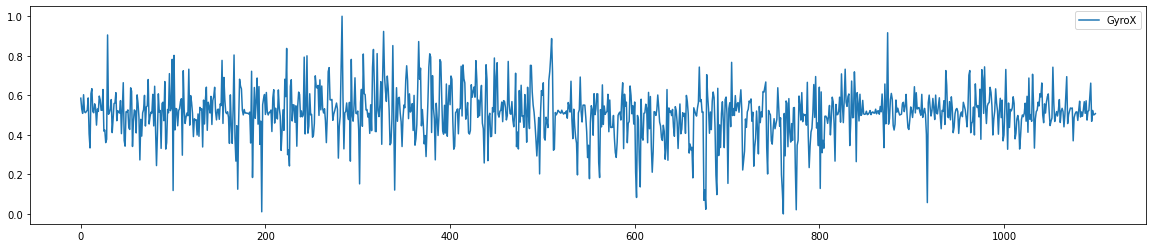

In [7]:
cols = list(dat.columns)

cols.remove('Class')
dat[cols] = dat[cols].apply(minmax_scale)

plotNormalize('GyroX', dat)

### <font color='black'>4 - Separando (Treinamento/Teste)</font>

In [8]:
'''
Criando objetos
'''
# X (atributos) | Y (Classe)
X = dat.drop('Class', axis=1).values
Y = dat['Class'].values

print("=== X ===")
print(X)
print("")
print("=== Y ===")
print(Y)

=== X ===
[[0.58535242 0.39623172 0.53768844 ... 0.40510521 0.20664248 0.22448998]
 [0.53056167 0.40832396 0.54032065 ... 0.38151009 0.21082954 0.26459853]
 [0.50853524 0.45613048 0.53242402 ... 0.3729428  0.20894552 0.25147754]
 ...
 [0.50082599 0.54836895 0.53752891 ... 0.6611112  0.57302714 0.19739087]
 [0.50247797 0.57508436 0.53202521 ... 0.62791987 0.56273214 0.20367268]
 [0.50743392 0.54668166 0.52564409 ... 0.63895338 0.56638734 0.20551096]]

=== Y ===
[1 1 1 ... 4 4 4]


In [9]:
'''
Divisão de conjunto de treinamento e teste.

Treinamento - 70% | Teste - 30%
'''

print("-> Conjunto Treinamento e Teste: (70% e 30%)\n")

models = ["R. Forest", "SVM", "Naive Bayes", "KNN"]
model_scores = []

#Dividindo dataset em treinamento e teste
split_test_size = 0.30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=split_test_size, random_state=0)

-> Conjunto Treinamento e Teste: (70% e 30%)



In [10]:
'''
Random Forest
'''
from sklearn import metrics

#Criando modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=13, criterion='entropy', random_state = 0)
model_rf.fit(X_train, Y_train.ravel())

# Verificando nos dados de teste
#Resultado - Random Forest
print("---------------------------")
print("- Random Forest:          -")
print("---------------------------")
result = model_rf.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))
print('\n')
model_scores.append(result*100.0)

rf_predict_test = model_rf.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rf_predict_test))
print('\n')

print("=== Classification Report ===")
print(classification_report(Y_test, rf_predict_test))
print('\n')

---------------------------
- Random Forest:          -
---------------------------
Accuracy: 99.39%


=== Confusion Matrix ===
[[ 57   0   0   0]
 [  0  90   0   0]
 [  0   0 101   0]
 [  1   0   1  80]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       0.98      1.00      0.99        57
          2       1.00      1.00      1.00        90
          3       0.99      1.00      1.00       101
          4       1.00      0.98      0.99        82

avg / total       0.99      0.99      0.99       330





In [11]:
'''
SVM
'''
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, Y_train)

# Verificando nos dados de teste
#Resultado - SVM
print("---------------------------")
print("- SVM:          -")
print("---------------------------")
result = model_svm.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))
print('\n')
model_scores.append(result*100.0)

rf_predict_test = model_svm.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rf_predict_test))
print('\n')

print("=== Classification Report ===")
print(classification_report(Y_test, rf_predict_test))
print('\n')

---------------------------
- SVM:          -
---------------------------
Accuracy: 96.06%


=== Confusion Matrix ===
[[54  0  3  0]
 [ 2 88  0  0]
 [ 7  0 94  0]
 [ 0  0  1 81]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       0.86      0.95      0.90        57
          2       1.00      0.98      0.99        90
          3       0.96      0.93      0.94       101
          4       1.00      0.99      0.99        82

avg / total       0.96      0.96      0.96       330





In [12]:
'''
Naive Bayes
'''
model_nb = GaussianNB()
model_nb.fit(X_train, Y_train.ravel())

#Resultado - Naive Bayes
print("---------------------------")
print("- Naive Bayes:            -")
print("---------------------------")
result = model_nb.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))
print('\n')
model_scores.append(result*100.0)

rf_predict_test = model_nb.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rf_predict_test))
print('\n')

print("=== Classification Report ===")
print(classification_report(Y_test, rf_predict_test))
print('\n')

---------------------------
- Naive Bayes:            -
---------------------------
Accuracy: 90.30%


=== Confusion Matrix ===
[[51  0  5  1]
 [ 2 88  0  0]
 [21  1 78  1]
 [ 1  0  0 81]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       0.68      0.89      0.77        57
          2       0.99      0.98      0.98        90
          3       0.94      0.77      0.85       101
          4       0.98      0.99      0.98        82

avg / total       0.92      0.90      0.91       330





In [13]:
'''
KNN
'''
# Valores de K
K = range(1,11)
aux = 0
# Teste dos modelos
for ck in K:
    knn = KNeighborsClassifier(n_neighbors=ck)
    knn.fit(X_train,Y_train)
    
    if(knn.score(X_test,Y_test) > aux):
        aux = knn.score(X_test,Y_test)
        k = ck
    
    print(ck, knn.score(X_test,Y_test))

1 0.996969696969697
2 0.996969696969697
3 0.996969696969697
4 0.996969696969697
5 0.996969696969697
6 0.9939393939393939
7 0.9939393939393939
8 0.9939393939393939
9 0.9939393939393939
10 0.9878787878787879


In [14]:
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train,Y_train)


#Resultado - KNN
print("---------------------------")
print("- KNN:            -")
print("---------------------------")
result = model_knn.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))
print('\n')
model_scores.append(result*100.0)

rf_predict_test = model_knn.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rf_predict_test))
print('\n')

print("=== Classification Report ===")
print(classification_report(Y_test, rf_predict_test))
print('\n')

---------------------------
- KNN:            -
---------------------------
Accuracy: 99.70%


=== Confusion Matrix ===
[[ 56   0   1   0]
 [  0  90   0   0]
 [  0   0 101   0]
 [  0   0   0  82]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       1.00      0.98      0.99        57
          2       1.00      1.00      1.00        90
          3       0.99      1.00      1.00       101
          4       1.00      1.00      1.00        82

avg / total       1.00      1.00      1.00       330





99.39% (R. Forest)
96.06% (SVM)
90.30% (Naive Bayes)
99.70% (KNN)


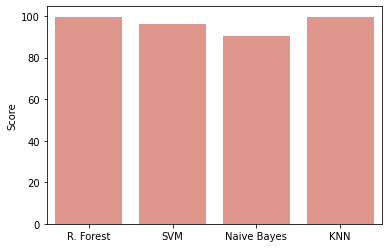

In [15]:
'''Comparação entre os Algoritmos
'''
for i in range(4):
    print("%.2f%% (%s)" % (model_scores[i], models[i]))
sns.barplot(x=[m for m in models], y=model_scores, color="salmon", saturation=.6);
plt.ylabel('Score')
plt.show()

### <font color='black'>4 - Salvando Modelo</font>

In [16]:
#Colocar modelo a ser salvo
model = model_knn

In [17]:
#Parâmetros de configuração
filename = 'modelo.pkl'

In [18]:
#Salava o modelo
pickle.dump(model, open(filename, 'wb'))

### <font color='black'>5 - Fazendo Previsões com o Modelo Treinado</font>

In [19]:
filename = 'modelo.pkl'

In [20]:
loaded_model = pickle.load(open(filename, 'rb'))

i = 5

result = loaded_model.predict(X_test[i].reshape(1, -1))
#result = loaded_model.predict(X_test)
print("Class (Previsão) = " + str(result))

print("\n\n")

print("Class Dataset:")
print(dat.loc[(dat['GyroX'] == X_test[i][0]) & (dat['GyroY'] == X_test[i][1]) & (dat['GyroZ'] == X_test[i][2])]['Class'])

Class (Previsão) = [2]



Class Dataset:
298    2
Name: Class, dtype: int64
